In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv("F:/ML Predictor/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df.shape

(14999, 10)

<AxesSubplot:>

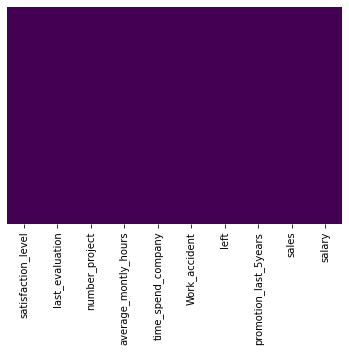

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

no null values

In [16]:
(df.duplicated()).sum()

3008

we have to drop duplicate values

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
(df.duplicated()).sum()

0

In [29]:
left = df[df.left==1]
left.shape

(1991, 10)

In [32]:
retained = df[df.left==0]
retained.shape

(10000, 10)

<AxesSubplot:xlabel='salary'>

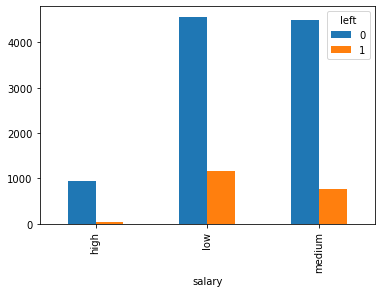

In [39]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<AxesSubplot:xlabel='sales'>

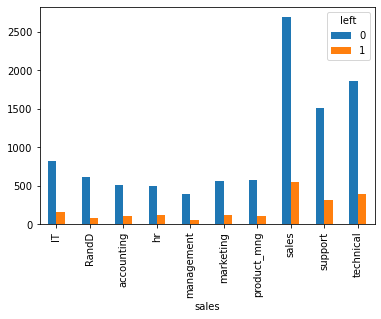

In [42]:
pd.crosstab(df.sales, df.left).plot(kind='bar')

In [43]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [44]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf, salary_dummies], axis = 'columns')

In [45]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [46]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [48]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [49]:
y = df.left

In [50]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
model.predict(X_test)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

#### Accuracy of model

In [55]:
model.score(X_test, y_test)

0.8525